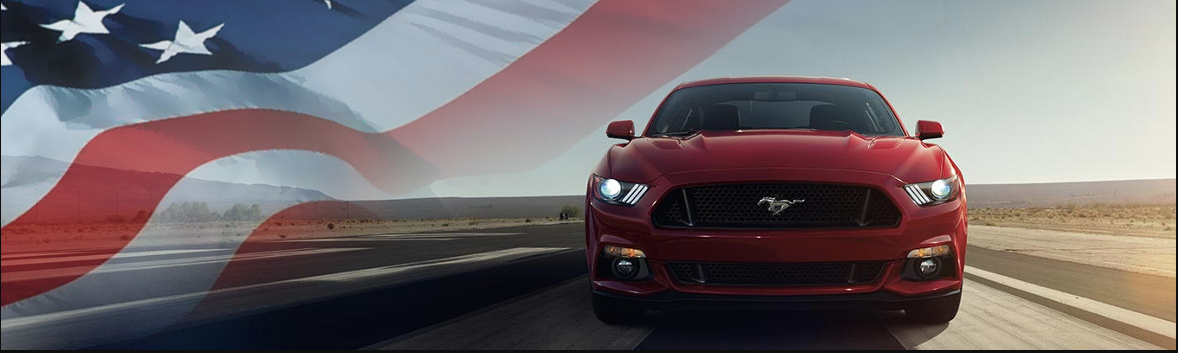

# Used Car Price Prediction in USA

Craigslist is the world's largest collection of used vehicles for sale, yet it's very difficult to collect all of them in the same place. This data create by scraping for a school project and expanded upon it later to create this dataset which includes every used vehicle entry within the United States on Craigslist.

This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 16 other categories. For previous listings, check older versions of the dataset.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('clean.csv')
df.drop(['Unnamed: 0','desc'], axis=1, inplace=True)

In [3]:
df.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
0,albany,1400,2010,pontiac,g6 gt,other,6 cylinders,gas,117000,clean,automatic,fwd,mid-size,convertible,other,42.783100,-73.907048
1,amarillo,18788,2019,dodge,grand caravan sxt,excellent,4 cylinders,gas,14288,clean,automatic,fwd,full-size,mini-van,grey,35.190532,-101.992343
2,appleton,16900,2017,jeep,cherokee,other,6 cylinders,gas,63506,clean,automatic,4wd,full-size,SUV,black,43.321936,-88.004611
3,asheville,7000,2003,ram,1500,other,8 cylinders,gas,161830,clean,automatic,4wd,full-size,pickup,other,35.681900,-82.018000
4,asheville,16999,2016,subaru,outback,excellent,4 cylinders,gas,97186,clean,automatic,4wd,mid-size,wagon,white,35.712600,-82.549100


# 4. Modeling

## 4.1 Find Best Algorithm

### 4.1.1 First Modeling

In [4]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [5]:
x = df.drop(['price'], axis=1)
y = df['price']
x = pd.get_dummies(x,drop_first=True)

Find best n_cv

In [6]:
scores_cv = []
for i in range(3,7):
    cv_score = cross_val_score(RandomForestRegressor(),x,y,cv=i)
    scores_cv.append(cv_score.mean())

/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-package

In [7]:
pd.DataFrame({'n_cv':[3,4,5,6] , 'cv score': scores_cv,}) 

,n_cv,cv score
0,3,0.700327
1,4,0.704990
2,5,0.705997
3,6,0.710634


optimum n_cv is = 5

In [8]:
def regression_model(n_cv):
    score = []
    model_name = ['Linear Regression','Lasso','Ridge','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor']
    models = [LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor]
    
    for item in models:
        mae = []
        rmse = []
        r2score = []
        kf = KFold(n_splits=n_cv,shuffle=True)
        for train_index , test_index in kf.split(x,y):
            X_train,X_test,y_train,y_test = x.iloc[train_index],x.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
            model = item()
            model.fit(X_train,y_train)
            prediction = model.predict(X_test)
            mae.append(round(mean_absolute_error(y_test,prediction),1))
            rmse.append(round(np.sqrt(mean_squared_error(y_test,prediction)),1))
            r2score.append(round(metrics.r2_score(y_test,prediction),1))            

        temp = [
            sum(mae)/n_cv,
            sum(rmse)/n_cv,
            sum(r2score)/n_cv
        ]
        score.append(temp)
    return pd.DataFrame(score,columns=['MAE','RMSE','R2Score'],index=model_name)

In [9]:
regression_model(5)

/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43287502.1247406, tolerance: 33089882.01456306
  positive)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60463811.60757446, tolerance: 33736982.42282864
  positive)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22

,MAE,RMSE,R2Score
Linear Regression,7.177626e+08,3.314791e+09,-6.904051e+11
Lasso,3.456020e+03,4.925320e+03,6.400000e-01
Ridge,3.495580e+03,4.907340e+03,6.200000e-01
DecisionTreeRegressor,3.755020e+03,5.544460e+03,5.200000e-01
RandomForestRegressor,2.933460e+03,4.277580e+03,7.200000e-01
GradientBoostingRegressor,2.970320e+03,4.261240e+03,7.000000e-01


### 4.1.2 Second Modeling 

- Car year make under 1975 are eliminated.
- Car prices under 1000 dollars are eliminated.
- Car odometer under 1000 mile are eliminated.
- Delete column latitude and longitude

In [10]:
df_a = df
df_a = df_a.drop(['lat','long'], axis=1)
df_a = df_a[df_a['year'] > 1975]
df_a = df_a[df_a['price'] > 1000]
df_a = df_a[df_a['odometer'] > 1000]

- Label encoding column condition to get quanitative rating:

In [11]:
df_a['condition'] = pd.Series(df_a['condition'].map({'salvage':0, 'fair':1, 'other':2, 'good':3, 'excellent':4, 'like new':5, 'new':6}))


- Label encoding column title_status to get quantitative rating:

In [12]:
df_a['title_status'] = pd.Series(df_a['title_status'].map({'parts only':0, 'missing':1, 'rebuilt':2, 'salvage':3, 'lien':4, 'clean':5}))


- Identify brand segmentation correlated through price's mean

In [13]:
mean_brand = []
name_brand = df_a['manufacturer'].unique() 
for item in name_brand:
    mean_brand.append(round(df_a[df_a['manufacturer'] == item]['price'].mean()))
df_mean_brand = pd.DataFrame({'brand': name_brand, 'mean': mean_brand,})

In [14]:
df_mean_brand[df_mean_brand['mean'] < 7500]['brand'].unique()

array(['pontiac', 'mercury', 'fiat', 'saturn', 'datsun'], dtype=object)

In [15]:
df_mean_brand[(df_mean_brand['mean'] > 7500) & (df_mean_brand['mean'] < 10000)]['brand'].unique()

array(['volkswagen', 'hyundai', 'honda', 'kia', 'nissan', 'mazda',
       'volvo', 'chrysler', 'lincoln', 'mini', 'mitsubishi', 'acura',
       'alfa-romeo'], dtype=object)

In [16]:
df_mean_brand[(df_mean_brand['mean'] > 10000) & (df_mean_brand['mean'] < 12500)]['brand'].unique()

array(['dodge', 'subaru', 'chevrolet', 'toyota', 'bmw', 'lexus',
       'cadillac', 'audi', 'buick', 'infiniti'], dtype=object)

In [17]:
df_mean_brand[(df_mean_brand['mean'] > 12500) & (df_mean_brand['mean'] < 15000)]['brand'].unique()

array(['jeep', 'ford', 'gmc', 'mercedes-benz', 'jaguar', 'land rover'],
      dtype=object)

In [18]:
df_mean_brand[df_mean_brand['mean'] > 15000]['brand'].unique()

array(['ram', 'rover', 'harley-davidson'], dtype=object)

In [19]:
def apply_manufacturer_price_segment(x):
    if any(s in x for s in ('pontiac', 'mercury', 'fiat', 'saturn', 'datsun')):
        return 'low' 
    elif any(s in x for s in ('volkswagen', 'hyundai', 'honda', 'kia', 'nissan', 'mazda',
       'volvo', 'chrysler', 'lincoln', 'mini', 'mitsubishi', 'acura',
       'alfa-romeo')):
        return 'entry'
    elif any(s in x for s in ('dodge', 'subaru', 'chevrolet', 'toyota', 'bmw', 'lexus',
       'cadillac', 'audi', 'buick', 'infiniti')):
        return 'middle'
    elif any(s in x for s in('jeep', 'ford', 'gmc', 'mercedes-benz', 'jaguar', 'land rover')):
        return 'high'
    else:
        return 'upper'

In [20]:
df_a['segment'] = df_a['manufacturer'].apply(apply_manufacturer_price_segment)
df_a.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,segment
0,albany,1400,2010,pontiac,g6 gt,2,6 cylinders,gas,117000,5,automatic,fwd,mid-size,convertible,other,low
1,amarillo,18788,2019,dodge,grand caravan sxt,4,4 cylinders,gas,14288,5,automatic,fwd,full-size,mini-van,grey,middle
2,appleton,16900,2017,jeep,cherokee,2,6 cylinders,gas,63506,5,automatic,4wd,full-size,SUV,black,high
3,asheville,7000,2003,ram,1500,2,8 cylinders,gas,161830,5,automatic,4wd,full-size,pickup,other,upper
4,asheville,16999,2016,subaru,outback,4,4 cylinders,gas,97186,5,automatic,4wd,mid-size,wagon,white,middle


In [21]:
x = df_a.drop(['price'], axis=1)
y = df_a['price']
x = pd.get_dummies(x,drop_first=True)

In [22]:
regression_model(5)

/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-package

,MAE,RMSE,R2Score
Linear Regression,3255.20,4554.20,0.68
Lasso,3032.06,4175.96,0.72
Ridge,3044.50,4176.04,0.70
DecisionTreeRegressor,3477.20,5026.24,0.60
RandomForestRegressor,2725.88,3908.72,0.80
GradientBoostingRegressor,2759.48,3839.88,0.78


We find out best MAE score when we use df_a - One Hot Encoder - Random Forest Regressor

## 4.2 Standar Scaler - One Hot Encoder - PCA - Random Forest Regressor

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Find best PCA

In [24]:
scores = []
for item in range(1,41):
    pca = PCA(n_components=item)
    x_pca = pca.fit_transform(x)
    x_pca_df_a = pd.DataFrame(x_pca,columns=['PC ' + str(i) for i in range(1,item+1)])
    cv_score = cross_val_score(RandomForestRegressor(),x_pca_df_a, y,cv=4)
    scores.append(cv_score.mean())

/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-package

/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-package

/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-package

/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-package

/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/bayu/anaconda3/lib/python3.7/site-package

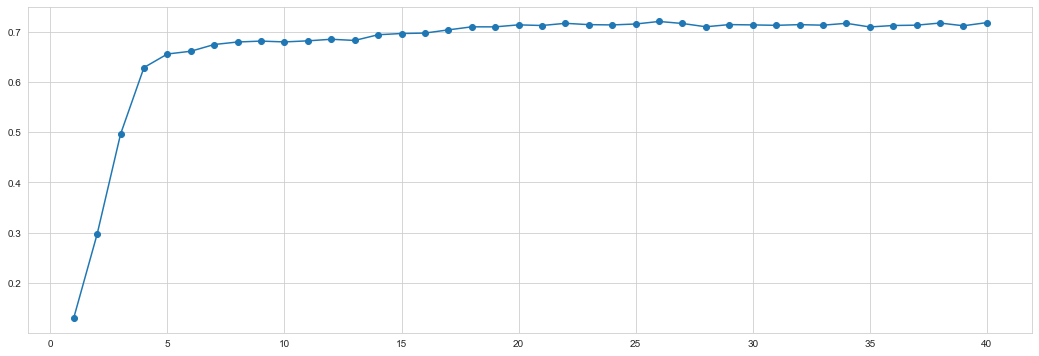

In [25]:
data_pca_score = pd.DataFrame(scores)

plt.figure(figsize=(18,6))
plt.plot(range(1,41),data_pca_score[0],marker='o')

From the graphic above, we get optimum PCA at 27

Now we apply standar scaler to df_a --> df_a_scaled

In [26]:
scaler = StandardScaler()
df_a = df_a.reset_index(drop=True)
x_num_transform = scaler.fit(df_a[['year','odometer','title_status','condition']])
x_num_scaled = x_num_transform.transform((df_a[['year','odometer','title_status','condition']]))

x_num_scaled_df_a = pd.DataFrame(x_num_scaled,columns=['year','odometer','title_status','condition'])
x_to_concat = df_a.drop(['year','odometer','title_status','condition'],axis=1)

df_a_scaled = pd.concat([x_num_scaled_df_a ,x_to_concat.reset_index(drop=True)],axis=1)

In [27]:
x_scaled = pd.get_dummies(df_a_scaled.drop(['price'], axis=1),drop_first=True)
y_scaled = df_a_scaled['price']

pca = PCA(n_components=27)
x_pca = pca.fit_transform(x_scaled)

X_train, X_test, y_train, y_test = train_test_split(x_pca,y_scaled, test_size=0.2, random_state=101)
model = RandomForestRegressor()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('MAE = ' , mean_absolute_error(y_test,prediction))
print('RMSE = ' , np.sqrt(mean_squared_error(y_test,prediction)))
print('R2Score = ' , r2_score(y_test,prediction))

/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE =  2874.522369901547
RMSE =  3989.6955094008786
R2Score =  0.7646672768442564


## 4.3 Standar Scaler - Binary Encoder - PCA - Random Forest Regressor

In [28]:
from category_encoders import BinaryEncoder

In [29]:
binaryEnc = BinaryEncoder(cols=['city', 'manufacturer','make','cylinders',
                               'fuel','transmission','drive','size','type','paint_color','segment'], drop_invariant=True)

x_scaled_binary = binaryEnc.fit_transform(df_a_scaled).drop(['price'],axis=1)
y_scaled_binary = df_a_scaled['price']

pca = PCA(n_components=27)
x_pca_binary = pca.fit_transform(x_scaled_binary)

X_train, X_test, y_train, y_test = train_test_split(x_pca_binary,y_scaled_binary, test_size=0.2,random_state=101)
model = RandomForestRegressor()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('MAE = ' , mean_absolute_error(y_test,prediction))
print('RMSE = ' , np.sqrt(mean_squared_error(y_test,prediction)))
print('R2Score = ' , r2_score(y_test,prediction))

/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE =  3353.2183966244725
RMSE =  4572.104308334308
R2Score =  0.6909454967012605


## 4.4 Standard Scaler - One Hot Encoder - Hyperparameter

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
x_scaled = pd.get_dummies(df_a_scaled.drop(['price'], axis=1),drop_first=True)
y_scaled = df_a_scaled['price']

parameter = {'min_samples_leaf' : [5,10,20], 'min_samples_split' : [2,4,6], 'max_depth' : [3,6,9]}
grid = GridSearchCV(RandomForestRegressor(n_estimators=100,random_state=101),parameter,cv=5)
grid.fit(x_scaled, y_scaled)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=101,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 6, 9],
           

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=101)
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [33]:
rfg = RandomForestRegressor(n_estimators=100, random_state=101, min_samples_leaf=5, max_depth=9, min_samples_split=2)
rfg.fit(X_train,y_train)

prediction = rfg.predict(X_test)

print('MAE = ' , mean_absolute_error(y_test,prediction))
print('RMSE = ' , np.sqrt(mean_squared_error(y_test,prediction)))
print('R2Score = ' , r2_score(y_test,prediction))

MAE =  2734.176609959554
RMSE =  3755.997892456128
R2Score =  0.7914292051295154


## 4.5 Standar Scaler - One Hot Encoder - XGboost Regressor

In [34]:
from xgboost import XGBRegressor

In [35]:
x_scaled = pd.get_dummies(df_a_scaled.drop(['price'], axis=1),drop_first=True)
y_scaled = df_a_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y_scaled, test_size=0.2,random_state=101)
model = XGBRegressor()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('MAE = ' , mean_absolute_error(y_test,prediction))
print('RMSE = ' , np.sqrt(mean_squared_error(y_test,prediction)))
print('R2Score = ' , r2_score(y_test,prediction))

/Users/bayu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:02:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE =  2701.473271031118
RMSE =  3720.9073971227253
R2Score =  0.7953081552461388


## 4.6 Standar Scaler - One Hot Encoder - Random Forest Regressor

In [36]:
x_scaled = pd.get_dummies(df_a_scaled.drop(['price'], axis=1),drop_first=True)
y_scaled = df_a_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y_scaled, test_size=0.2,random_state=101)
model = RandomForestRegressor()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('MAE = ' , mean_absolute_error(y_test,prediction))
print('RMSE = ' , np.sqrt(mean_squared_error(y_test,prediction)))
print('R2Score = ' , r2_score(y_test,prediction))

/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE =  2612.209071729958
RMSE =  3686.9189772748537
R2Score =  0.7990305684969217


So far best MAE score obtained with df_a , standard scaler, and Random Forest Regressor

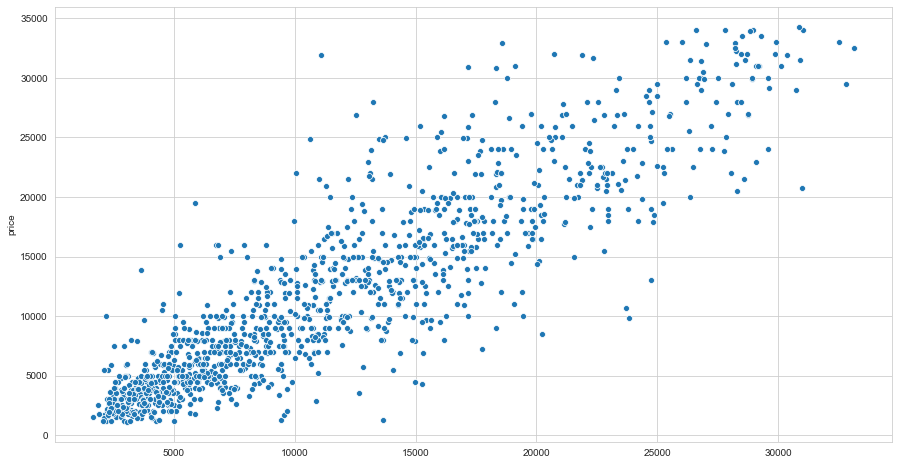

In [37]:
plt.figure(figsize=(15,8))
sns.scatterplot(prediction,y_test)

In [38]:
df_prediction = pd.DataFrame({'y_true' : y_test , 'y_pred' : prediction})
df_prediction['selisih'] = round(df_prediction['y_true'] - df_prediction['y_pred'])
df_selisih = df_prediction.sort_values(by='selisih',ascending=False)
df_selisih.head()

,y_true,y_pred,selisih
1650,31900,11076.5,20824.0
3768,27990,13233.6,14756.0
4206,32950,18559.2,14391.0
2195,26900,12543.8,14356.0
1890,24900,10616.7,14283.0


In [39]:
df_a.loc[1650]

city            detroit metro
price                   31900
year                     2015
manufacturer           toyota
make                  sequoia
condition                   4
cylinders         4 cylinders
fuel                      gas
odometer               110000
title_status                5
transmission        automatic
drive                     fwd
size                full-size
type                      SUV
paint_color             black
segment                middle
Name: 1650, dtype: object

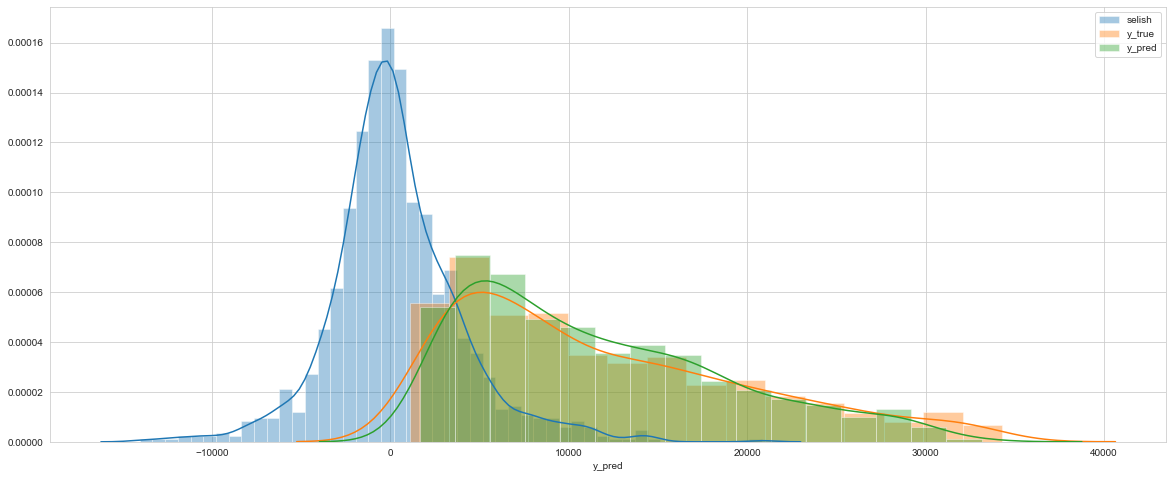

In [40]:
plt.figure(figsize=(20,8))
sns.distplot(df_selisih['selisih'], label='selish')
sns.distplot(df_selisih['y_true'], label='y_true')
sns.distplot(df_selisih['y_pred'], label='y_pred')
plt.legend()

Check features important:

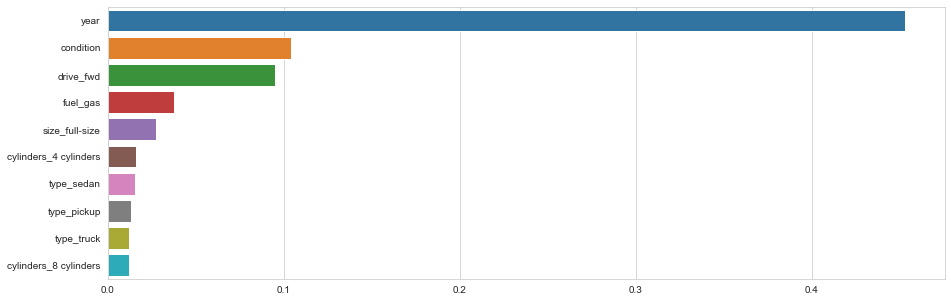

In [41]:
plt.figure(figsize=(15,5))
feature_importance = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False).head(10)
sns.barplot(x=feature_importance.values , y = feature_importance.index)

# Export

## Pipeline

In [42]:
import pickle
from sklearn.pipeline import Pipeline

In [43]:
pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('modeling', RandomForestRegressor())
])

In [44]:
pipe.fit(X_train,y_train)

/Users/bayu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('modeling',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [45]:
pipe.predict([X_test.iloc[0]])

array([22684.5])

In [46]:
pickle.dump(pipe,open('pipe.sav','wb'))

## Export Model

In [47]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [48]:
filename = 'x_dummies_colomn.sav'
pickle.dump(x.columns, open(filename , 'wb'))

In [49]:
filename = 'real_colomn.sav'
pickle.dump(df_a.drop('price',axis=1).columns, open(filename , 'wb'))